In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/trades-usdt-weth.csv')

In [6]:
def decimal_adjust(asset, x):
    if asset == 'WETH': return int(x) / 1e18
    elif asset == 'USDT': return int(x) / 1e6
    elif asset == 'WBTC': return int(x) / 1e8
    else: return int(x)

def volume(x):
    if x.SOLD_ASSET == 'USDT': return x.SOLD_AMOUNT_ADJ
    else: return x.BOUGHT_AMOUNT_ADJ

df['UNI05_QUOTE_ADJ'] = df.apply(lambda x: decimal_adjust(x.BOUGHT_ASSET, x.UNI05_QUOTE), axis=1)
df['UNI30_QUOTE_ADJ'] = df.apply(lambda x: decimal_adjust(x.BOUGHT_ASSET, x.UNI30_QUOTE), axis=1)
df['CURVE_QUOTE_ADJ'] = df.apply(lambda x: decimal_adjust(x.BOUGHT_ASSET, x.CURVE_QUOTE), axis=1)
df['SOLD_AMOUNT_ADJ'] = df.apply(lambda x: decimal_adjust(x.SOLD_ASSET, x.SOLD_AMOUNT), axis=1)
df['BOUGHT_AMOUNT_ADJ'] = df.apply(lambda x: decimal_adjust(x.BOUGHT_ASSET, x.BOUGHT_AMOUNT), axis=1)
df['VOLUME'] = df.apply(volume, axis=1)


In [13]:
def best_quote(x):
    return max([x.UNI05_QUOTE_ADJ, x.UNI30_QUOTE_ADJ, x.CURVE_QUOTE_ADJ])

def best_quote_source(x):
    if x.CURVE_QUOTE_ADJ > x.UNI05_QUOTE_ADJ and x.CURVE_QUOTE_ADJ > x.UNI30_QUOTE_ADJ: return 'CURVE'
    elif x.UNI05_QUOTE_ADJ > x.UNI30_QUOTE_ADJ: return 'UNI05'
    else: return 'UNI30'

def venue(x):
    if x.POOL == '0xD51a44d3FaE010294C616388b506AcdA1bfAAE46': return 'CURVE'
    elif x.POOL == '0x11b815efb8f581194ae79006d24e0d814b7697f6': return 'UNI05'
    else: return 'UNI30'

df['BEST_QUOTE'] = df.apply(best_quote, axis=1)
df['BEST_QUOTE_SOURCE'] = df.apply(best_quote_source, axis=1)
df['VENUE'] = df.apply(venue, axis=1)

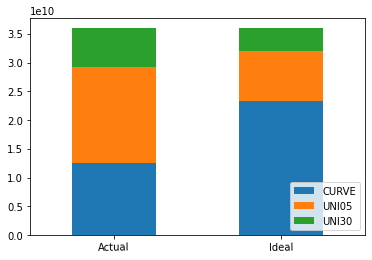

In [15]:
import matplotlib.pyplot as plt
from pandas import concat
concat([df.groupby('VENUE').VOLUME.sum(), df.groupby('BEST_QUOTE_SOURCE').VOLUME.sum()], keys=['Actual', 'Ideal'], names=['','']).unstack().plot(kind='bar',stacked=True,rot=1)
plt.legend(loc='lower right', ncol=1)
plt.show()